# **Business problem** ##


An e-commerce company is struggling with poor data quality, inconsistent reports, and unreliable KPIs.
Due to messy transaction data (missing values, duplicates, inconsistent categories, invalid prices and quantities), the business cannot correctly track:

Total sales & revenue

Top customers

Best performing categories

Accurate daily/monthly trends

Profitability insights

Inventory & demand patterns

RFM analysis (churn)

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px






# *  Data Understanding   #

In [2]:
df=pd.read_csv(r"C:\Users\HBQ\Downloads\messy_ecommerce_data.csv")

In [3]:
df.head(20)

,order_id,customer_id,product_id,product_category,quantity,unit_price,order_date
0,1,8270.0,587,NaN,1,196.54,2021-01-01 00:00:00
1,2,1860.0,277,Clothing,7,145.74,2021-01-01 00:01:00
2,3,6390.0,619,toys,9,68.14,2021-01-01 00:02:00
3,4,6191.0,785,Clothing,8,333.42,2021-01-01 00:03:00
4,5,6734.0,688,Clothing,5,256.00,2021-01-01 00:04:00
5,6,7265.0,175,Electronics,2,64.51,2021-01-01 00:05:00
6,7,1466.0,953,NaN,1,207.21,2021-01-01 00:06:00
7,8,5426.0,637,Electronics,2,10.25,2021-01-01 00:07:00
8,9,6578.0,575,Sports,6,NaN,2021-01-01 00:08:00
9,10,9322.0,638,toys,8,102.81,2021-01-01 00:09:00


order_id : Unique identifier for each order/transaction.

customer_id: Unique identifier assigned to each customer.

product_id : Unique identifier for each product.

product_category : Category to which the product belongs (e.g., Clothing, Electronics, Toys).

quantity : Number of units purchased per order.

unit_price : Price per unit of the product.

order_date : Date and time when the order was placed.


In [4]:
df.shape

(200800, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200800 entries, 0 to 200799
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          200800 non-null  int64  
 1   customer_id       199796 non-null  float64
 2   product_id        200800 non-null  int64  
 3   product_category  175589 non-null  object 
 4   quantity          200800 non-null  int64  
 5   unit_price        195776 non-null  float64
 6   order_date        200800 non-null  object 
dtypes: float64(2), int64(3), object(2)
memory usage: 10.7+ MB


there are some diffrent data types which haved to be changed 

In [6]:
df.isna().sum()

order_id                0
customer_id          1004
product_id              0
product_category    25211
quantity                0
unit_price           5024
order_date              0
dtype: int64

there are some null values in customerid, productid and unitprice 


In [7]:
df.columns.to_list()

['order_id',
 'customer_id',
 'product_id',
 'product_category',
 'quantity',
 'unit_price',
 'order_date']

In [8]:
numeric=['quantity','unit_price']

In [9]:
for coloums in numeric:
    valuecounts=df[coloums].unique()
    print(f"Column: {coloums}")
    print(f"{'='*40}")
    print(valuecounts)
  


Column: quantity
[ 1  7  9  8  5  2  6  3  4 -3]
Column: unit_price
[196.54 145.74  68.14 ... 458.48 107.7  144.75]


the quantity coloum mostly conisist of positive value but in this data there is a negetive value  (-3) which is unusual

In [10]:
df["quantity"].value_counts()

quantity
 4    22154
 2    22099
 3    22034
 5    21997
 1    21952
 6    21941
 7    21937
 9    21928
 8    21746
-3     3012
Name: count, dtype: int64

In [11]:
df["product_category"].unique()

array([nan, 'Clothing', 'toys', 'Electronics', 'Sports', 'Toys',
       'ELECTRONICS', 'Home & Kitchen'], dtype=object)

in product category there are null values and some are upper and lower case here 

In [12]:
df["product_category"].value_counts()

product_category
Electronics       25176
toys              25106
Sports            25101
ELECTRONICS       25081
Home & Kitchen    25067
Toys              25056
Clothing          25002
Name: count, dtype: int64

# **EDA**     Exploratory Data Analysis

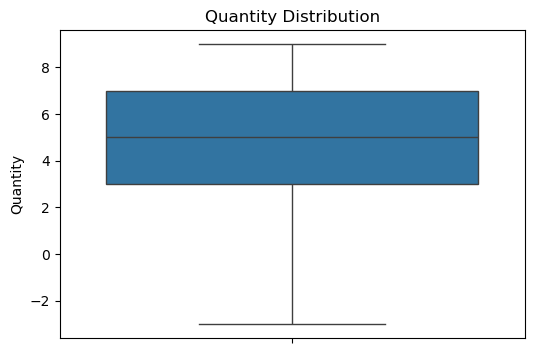

In [13]:
plt.figure(figsize=(6,4))
sns.boxplot(df['quantity'])
plt.title('Quantity Distribution')
plt.ylabel('Quantity')
plt.show()

we can see that there are no outliers in quantity 

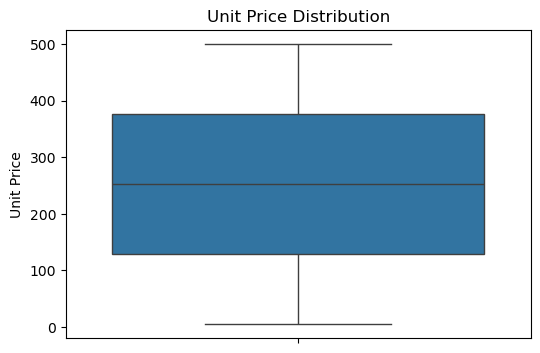

In [14]:
plt.figure(figsize=(6,4))
sns.boxplot(df['unit_price'])
plt.title('Unit Price Distribution')
plt.ylabel('Unit Price')
plt.show()

by this above bloxt plots  we can see there are no outliers in  this unit price 


In [15]:
df.isna().sum()

order_id                0
customer_id          1004
product_id              0
product_category    25211
quantity                0
unit_price           5024
order_date              0
dtype: int64

there are missing values in customerid, productcategory, and unitprice 


In [16]:
df.duplicated().sum()#

800

 there are some duplicates also in it 

In [17]:

df[numeric].skew() 

quantity     -0.236710
unit_price    0.000145
dtype: float64

the quanity is left skewed we can see that the values are between -0.5 to 0.5  so we likely dont need to apply any transformations 

In [18]:

q1=df["unit_price"].quantile(0.25)
q3=df["unit_price"].quantile(0.75)
iqr = q3-q1
print(iqr)
ll=q1-(iqr*1.5)
up=q3+(iqr*1.5)
print('ll:',ll,'up:',up)


247.57999999999998
ll: -242.69 up: 747.63


## **DATA CLEANING** #

In [19]:
df["unit_price"].median()

252.975

In [20]:
df["quantity"]=df["quantity"].abs() 

changed the data to absolute value usings abs because there were negative values in there 

In [21]:
df.isna().sum()

order_id                0
customer_id          1004
product_id              0
product_category    25211
quantity                0
unit_price           5024
order_date              0
dtype: int64

In [22]:
df.isnull().sum()/len(df)*100

order_id             0.000000
customer_id          0.500000
product_id           0.000000
product_category    12.555279
quantity             0.000000
unit_price           2.501992
order_date           0.000000
dtype: float64

In [23]:
df.dropna(subset=["customer_id"],inplace=True)

droped the null values beacause we cannnot replace it with the mean, median or mode 

In [24]:
# mode_product=df["product_category"].mode()[0]
df["product_category"]=df["product_category"].fillna("unknown")
 # replaced the null values using mode 

replaced the values using  unknow  to preserve the data integrity and avoid information loss 

In [25]:

df["unit_price"].fillna(df["unit_price"].mean(),inplace=True)  

replaced the null values using mean 

In [26]:
df["customer_id"] = df["customer_id"].astype(int)  

 changed the data type 

In [27]:
df["product_category"]=df["product_category"].str.strip().str.lower() 

standardedized to lower 

In [28]:
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce').dt.normalize() 

changed the datetime to data 

In [29]:
df["revenue"]=df["unit_price"] * df["quantity"]


created an new coloum revenue 

In [30]:
df["revenue"].sum()

250397385.81552717

In [31]:
df["estimated_profit"] = df["revenue"] * 0.30  

created a coloum estimated profit of 30%  

In [32]:
df.tail(5)



,order_id,customer_id,product_id,product_category,quantity,unit_price,order_date,revenue,estimated_profit
200795,796,5289,772,toys,7,317.70,2021-01-01,2223.90,667.170
200796,797,1846,732,clothing,2,461.23,2021-01-01,922.46,276.738
200797,798,7316,287,toys,7,311.73,2021-01-01,2182.11,654.633
200798,799,7469,795,electronics,5,147.65,2021-01-01,738.25,221.475
200799,800,9915,239,home & kitchen,4,130.04,2021-01-01,520.16,156.048


## **DATA ANALYSIS** #  

In [33]:

category_sales = (df.groupby("product_category")["revenue"].sum().reset_index())
print(category_sales)


  product_category       revenue
0         clothing  3.124697e+07
1      electronics  6.294718e+07
2   home & kitchen  3.105097e+07
3           sports  3.095890e+07
4             toys  6.288688e+07
5          unknown  3.130648e+07


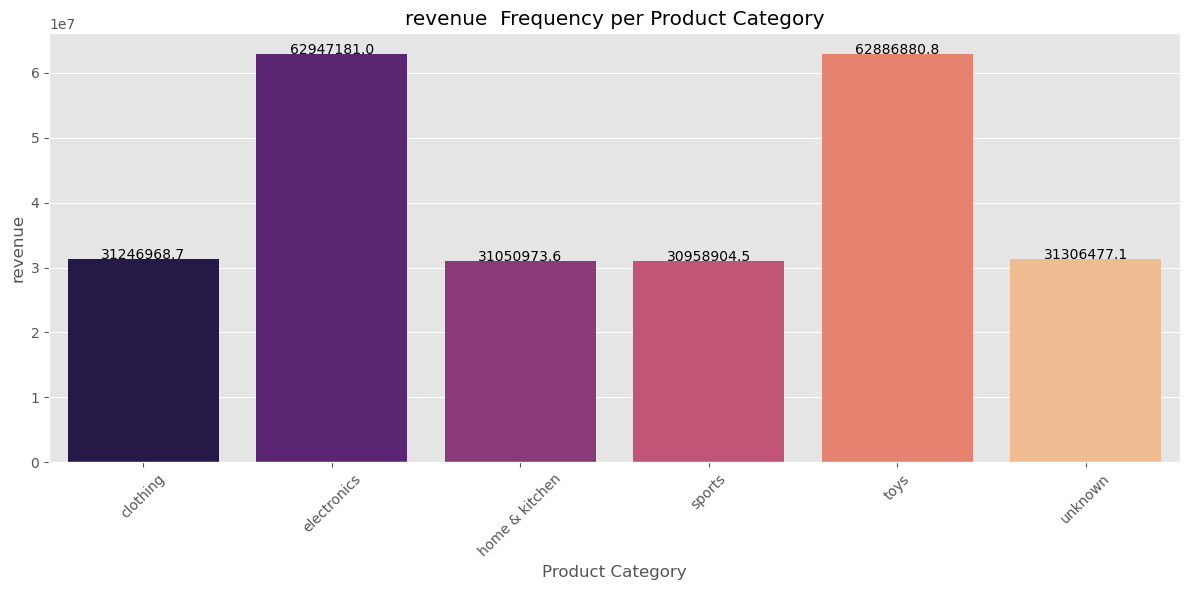

In [34]:
plt.style.use("ggplot")

plt.figure(figsize=(12,6))
sns.barplot(
    data=category_sales,
    x="product_category",
    y="revenue",
    hue='product_category',
    palette="magma"
)

plt.title("revenue  Frequency per Product Category")
plt.xlabel("Product Category")
plt.ylabel("revenue")
plt.xticks(rotation=45)
plt.tight_layout()


for i, value in enumerate(category_sales['revenue']):
    plt.text(i, value + 2, f'{value:.1f}', ha='center')
plt.show()


* Insights 

Electronics and Toys are the top revenue-generating categories, each contributing the highest share of total revenue.

Clothing, Home & Kitchen, and Sports show moderate but consistent revenue, indicating stable demand.

The “Unknown” category contributes a significant amount of revenue, highlighting a data quality issue where product categories are missing .

In [35]:
daily_revenue=df.groupby("order_date")["revenue"].sum().reset_index()
daily_revenue



,order_date,revenue
0,2021-01-01,2.681855e+06
1,2021-01-02,1.797129e+06
2,2021-01-03,1.804357e+06
3,2021-01-04,1.781212e+06
4,2021-01-05,1.799647e+06
...,...,...
134,2021-05-15,1.804854e+06
135,2021-05-16,1.781054e+06
136,2021-05-17,1.784617e+06
137,2021-05-18,1.724626e+06


In [65]:

plt.style.use("ggplot")
fig =px.line(data_frame=daily_revenue,
             x="order_date",
             y="revenue",
             title="total revenue trend ",
             markers=True)
           


fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Revenue",
    hovermode="x unified"
)

fig.show()

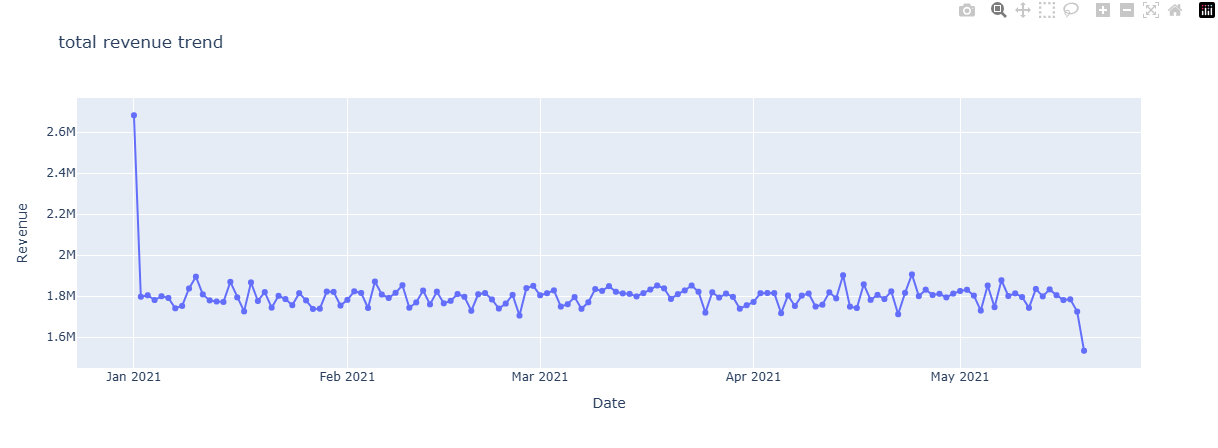

* insights 

Revenue shows high at the beginning of January, followed by a drop and then a stable daily pattern around ₹1.7M–₹1.9M.

No strong upward or downward trend is observed, indicating consistent sales performance with minor day-to-day fluctuations.

      customer_id       revenue
0            1000  27075.144340
1            1001  24391.900000
2            1002  13519.010000
3            1003  32190.128113
4            1004  29270.850000
...           ...           ...
8994         9994  30517.280000
8995         9995  49581.390000
8996         9996  26268.978113
8997         9997  31597.820000
8998         9998  37685.280000

[8999 rows x 2 columns]


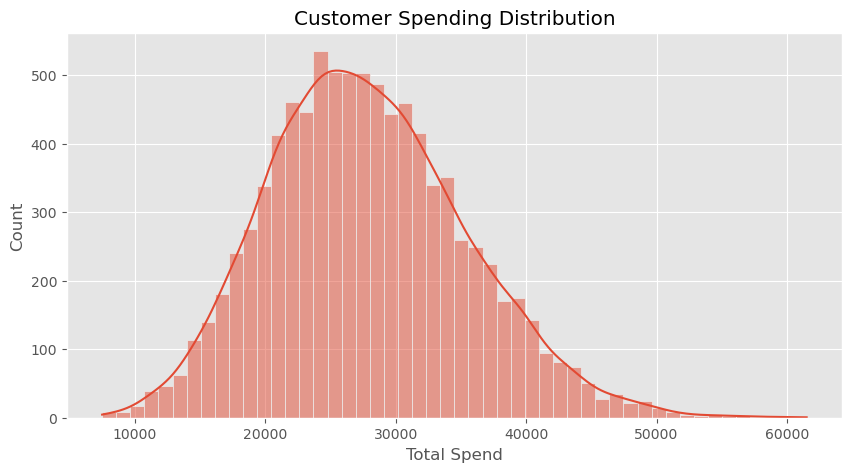

In [37]:





customer_sales = df.groupby("customer_id")['revenue'].sum().reset_index()  
print(customer_sales)
plt.figure(figsize=(10,5))
sns.histplot(customer_sales["revenue"], bins=50, kde=True)
plt.title("Customer Spending Distribution")
plt.xlabel("Total Spend")
plt.show()



* Insights

Most customers comes under the mid-spending range, with total spend amount around ₹20,000–₹30,000.

A small group of high spenders exists on the right tail, presenting an opportunity for loyalty programs.

In [38]:
df["customer_seg"]=pd.cut(df["revenue"],labels= ["low","medium","high"],bins=[0,1500,3000,4500])
df['customer_seg'].value_counts()

customer_seg
low       132975
medium     51194
high       15627
Name: count, dtype: int64

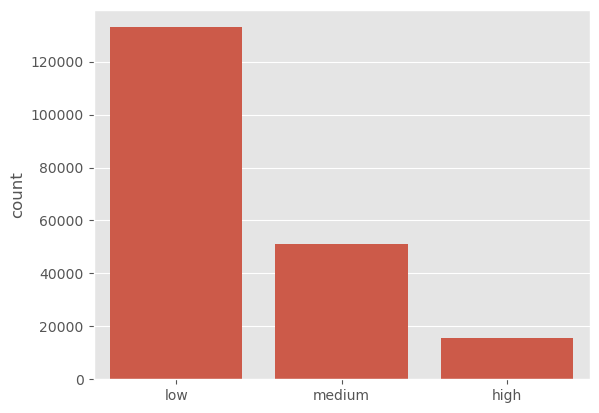

In [39]:

sns.barplot(x=df['customer_seg'].unique(),y=df['customer_seg'].value_counts())
plt.show()

* Insights

Most customers fall into the “low” segment, indicating a large base of infrequent or low-spending customers.

High-value customers are a small but critical segment, suggesting opportunities for targeted retention, loyalty programs, and personalized offers to increase lifetime value.

In [40]:

df["month"] = df["order_date"].dt.to_period("M").dt.to_timestamp()
print("month")


monthly_revenue = df.groupby("month")["revenue"].sum().reset_index()
print(monthly_revenue)

monthly_revenue["month"]=monthly_revenue["month"].astype(str)


month
       month       revenue
0 2021-01-01  5.642307e+07
1 2021-02-01  5.021683e+07
2 2021-03-01  5.588530e+07
3 2021-04-01  5.395812e+07
4 2021-05-01  3.391406e+07


In [64]:
plt.style.use('ggplot')
fig=px.line(data_frame=monthly_revenue,
            y='revenue',
            x='month',
            markers=True,
             color_discrete_map={
        'Low Paying': 'orange',
        'Medium Paying': 'blue',
        'High Paying': 'green'}
            )
fig.update_layout(
    xaxis_title="months",
    yaxis_title="Revenue",
    hovermode="x unified")
fig.update_xaxes(
    tickmode='array',
    tickvals=monthly_revenue['month'],
    ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May'])
fig.update_traces(
    line=dict(color="#b41f4c") )

fig.show()

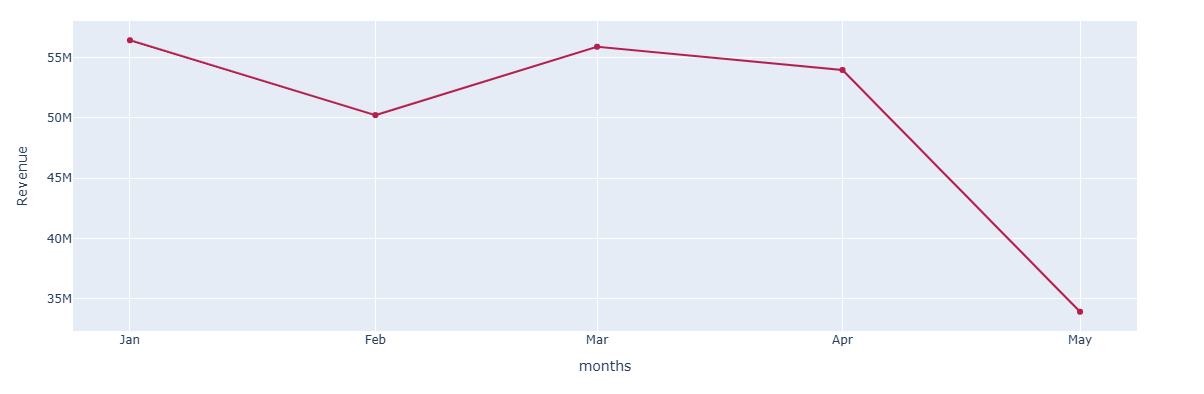

* Insights 

Revenue remains strong and stable from January to April, with a peak in March, indicating consistent demand in the first four months.

A sharp drop in May suggests a potential seasonal slowdown, incomplete data, or external impact, which should be investigated further before drawing conclusions.

             Recency  Frequency      Monetary
customer_id                                  
1000               3         23  27075.144340
1001              10         24  24391.900000
1002               4         11  13519.010000
1003               4         28  32190.128113
1004              13         19  29270.850000


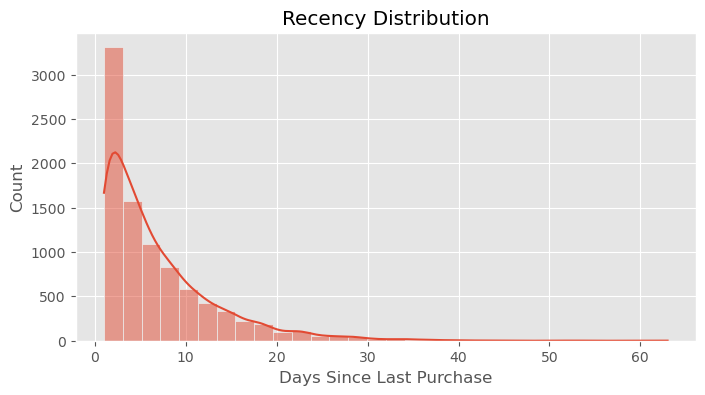

In [42]:
import datetime as dt

NOW = df["order_date"].max() + pd.Timedelta(days=1)

rfm = df.groupby("customer_id").agg({
    "order_date": lambda x: (NOW - x.max()).days,
    "order_id": "count",
    "revenue": "sum"
})

rfm.columns = ["Recency", "Frequency", "Monetary"]
print(rfm.head())

plt.style.use("ggplot")
plt.figure(figsize=(8,4))
sns.histplot(rfm["Recency"], bins=30, kde=True)
plt.title("Recency Distribution")
plt.xlabel("Days Since Last Purchase")
plt.show()

* Insights 

Most customers made a purchase very recently (within a few days), indicating active customers.

The long right tail shows customers who haven’t purchased in a long time, highlighting a segment at risk of churn and an opportunity for re-perfom  campaigns.

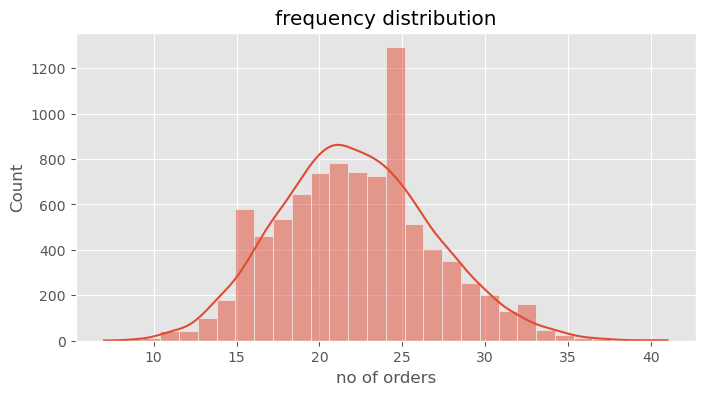

In [43]:
plt.style.use("ggplot")
plt.figure(figsize=(8,4))
sns.histplot(rfm["Frequency"],bins=30,kde=True)
plt.title("frequency distribution")
plt.xlabel("no of orders")
plt.show()

*  Insights 

Most customers place around 18–25 orders, showing a strong core of repeat buyers.

Fewer customers place very high numbers of orders, indicating a small but valuable loyal customer segment.

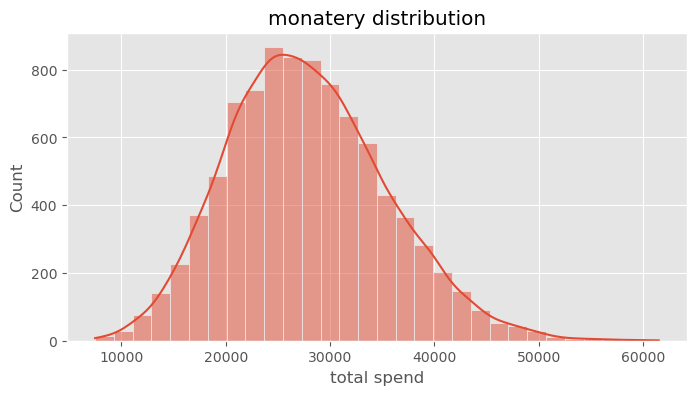

In [44]:
plt.style.use("ggplot")
plt.figure(figsize=(8,4))
sns.histplot(rfm["Monetary"],bins=30,kde=True)
plt.title("monatery distribution")
plt.xlabel("total spend")
plt.show()

* Insights 

Most customers spend in the mid-range 20k–30k, indicating a strong  revenue.

A small number of customers spend significantly more, creating a right-skewed tail and contributing disproportionately to total revenue.


In [63]:
fig=px.scatter(rfm,
               x="Frequency",
               y="Monetary",
               title="frequency vs monatary(customer value analysis)",
               opacity=0.4,
               color="Monetary"
)
fig.update_layout(
    xaxis_title="Frequency (Number of Purchases)",
    yaxis_title="Monetary (Total Spend)",
    hovermode="closest"
)
fig.show()

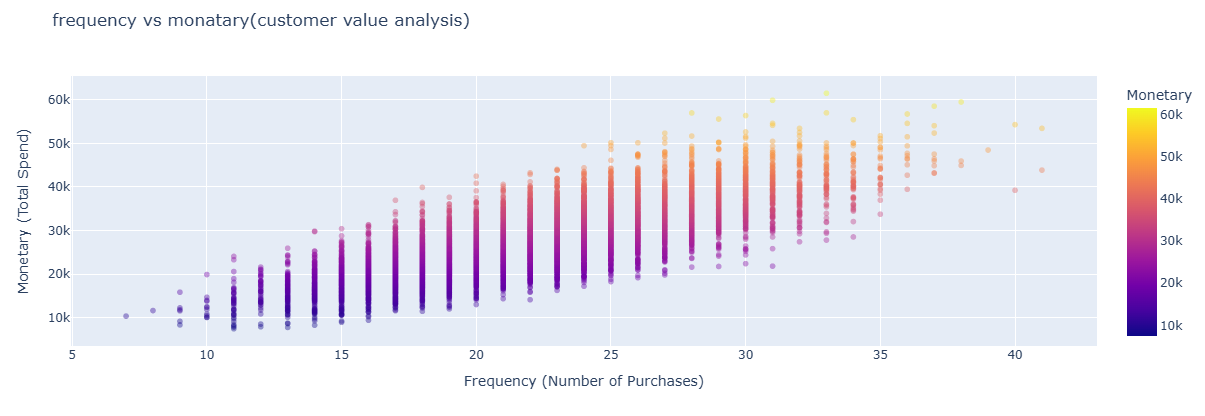

* Insights 

There is a strong positive relationship between purchase frequency and total spend—customers who buy more often generally spend more.

High-frequency, high-monetary customers are your most valuable segment and should be prioritized for loyalty, retention, and premium offers.

In [46]:
# recency vs monatry (churn analysis)

fig = px.scatter(
    rfm,
    x="Recency",
    y="Monetary",
    title="Churn Risk Identification",
    opacity=0.6,
    color="Monetary",
    color_continuous_scale="Plasma"
)

# Add churn threshold line (Recency = 60 days)
fig.add_vline(
    x=60,
    line_dash="dash",
    line_color="red",
    annotation_text="Churn Threshold (60 days)",
    annotation_position="top right"
)

fig.update_layout(
    xaxis_title="Recency (Days Since Last Purchase)",
    yaxis_title="Monetary (Total Spend)",
    hovermode="closest"
)

fig.show()

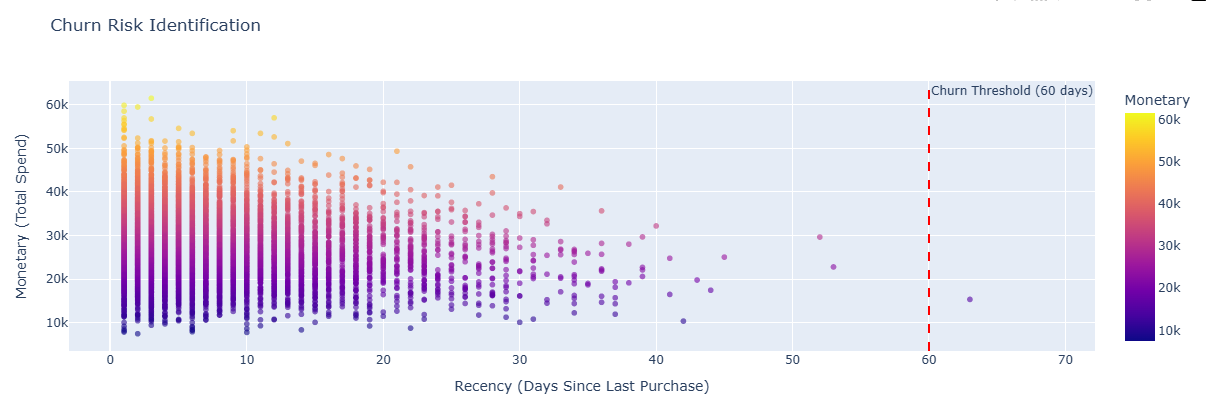

* Insights

Customers who have not bought anything for a long time and spend very little money are most likely to stop buying from you.

Customers who usually spend a lot, but haven’t purchased recently, are a warning sign — re-engage offers before they cross the churn line.

In [47]:
# profitable trends 

monthly_profit = df.groupby("month")["estimated_profit"].sum().reset_index()
print(monthly_profit)

plt.style.use('ggplot')
fig=px.line(data_frame=monthly_profit,
            y='estimated_profit',
            x='month',
            markers=True
        
 )
fig.update_xaxes(
    tickmode='array',
    tickvals=monthly_profit['month'],
    ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May'])

    
fig.show()

       month  estimated_profit
0 2021-01-01      1.692692e+07
1 2021-02-01      1.506505e+07
2 2021-03-01      1.676559e+07
3 2021-04-01      1.618744e+07
4 2021-05-01      1.017422e+07


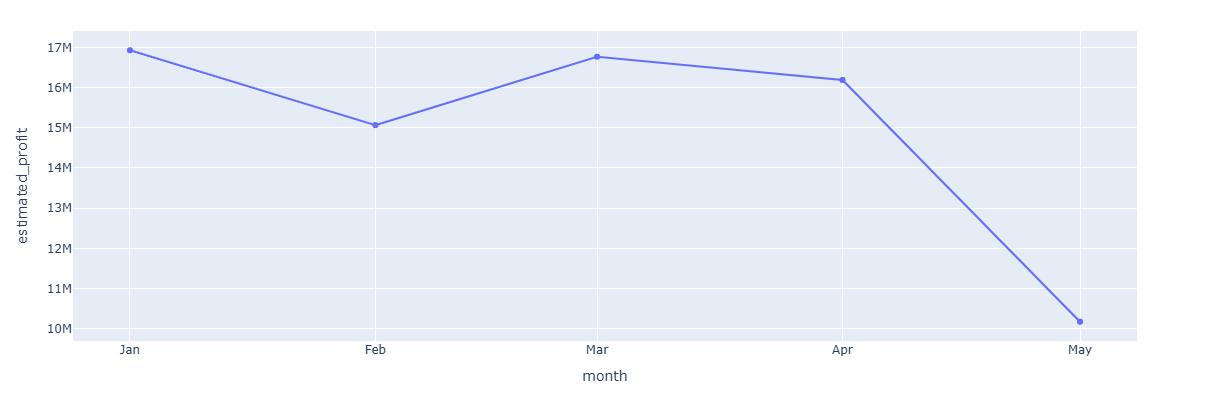

In [48]:
# estimated profit by category 
category_profit = df.groupby("product_category")["estimated_profit"].sum().reset_index()
category_profit["estimated_profit"] = category_profit["estimated_profit"].round(2)
print("category_profit", category_profit)

category_profit   product_category  estimated_profit
0         clothing        9374090.61
1      electronics       18884154.31
2   home & kitchen        9315292.09
3           sports        9287671.36
4             toys       18866064.23
5          unknown        9391943.14


In [49]:

fig=px.bar(
    data_frame=category_profit,
    x="product_category",
    y="estimated_profit",
    text="estimated_profit",
    color="estimated_profit"
)
fig.update_traces(textposition="outside")


fig.show()

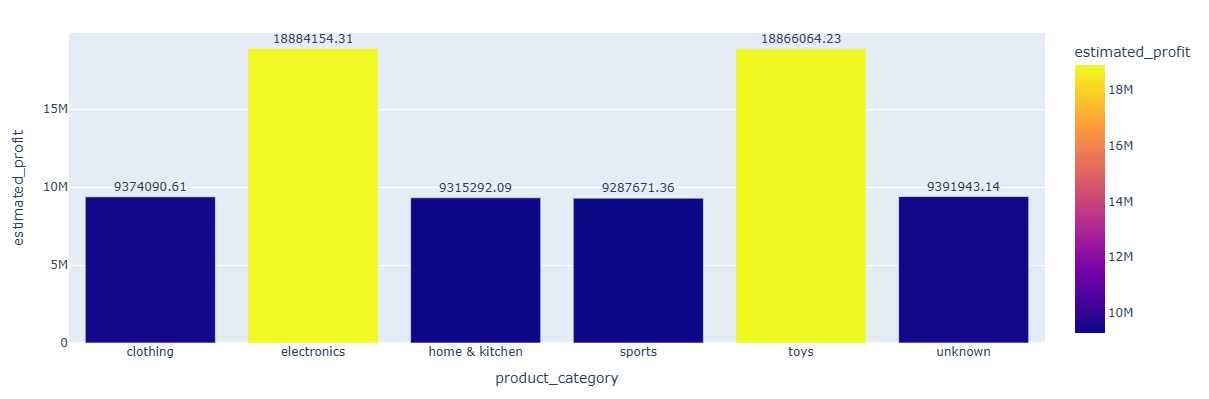

* Insights

Electronics and Toys generate the highest estimated profit, making them the most valuable product categories.

Clothing, Home & Kitchen, Sports, and Unknown show much lower and similar profit levels, meaning they contribute less compared to the top two.

** Focus more on Electronics and Toys to maximize profits.

In [50]:
segment_profit=df.groupby("customer_seg")["estimated_profit"].sum().reset_index()
segment_profit["estimated_profit"] = segment_profit["estimated_profit"].round(2)
fig = px.bar(
    data_frame=segment_profit,
    x="customer_seg",
    y="estimated_profit",
    text="estimated_profit",
    color="estimated_profit",
    color_continuous_scale="Viridis" 
   
)
fig.update_traces(textposition="outside")

fig.show()

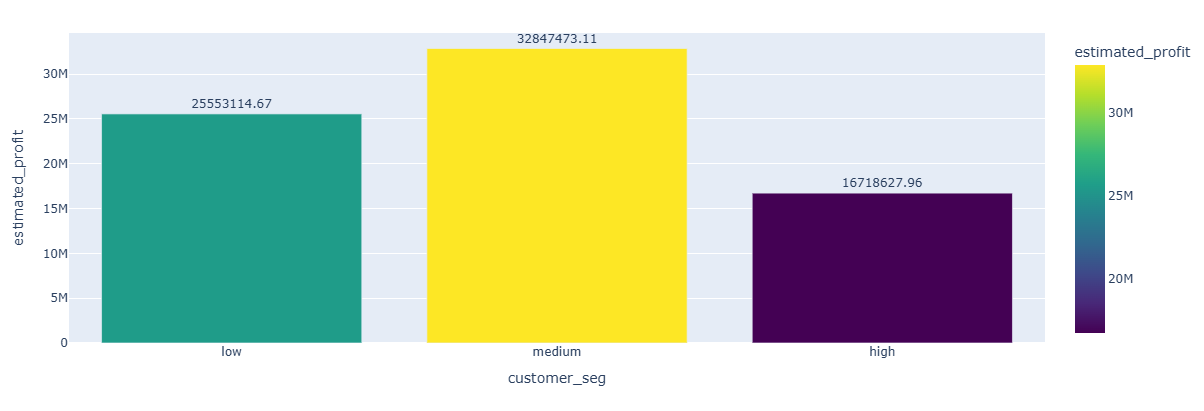

* Insights 

Medium-value customers generate the highest total profit, even more than high-value customers.

Low-value customers also contribute a large share, while high-value customers are fewer, so their total profit is lower.

# **summary**  ##

This analysis explores sales performance, customer behavior, and profitability using transaction data. Electronics and toys are the top revenue and profit-generating categories, while overall revenue remains mostly stable over time with a slight drop toward the end. Customer spending follows a clear pattern where medium-value customers contribute the highest total profit, making them the most important segment for the business.

RFM analysis shows that frequent buyers spend more, and customers who haven’t purchased recently are at higher churn risk. Overall, the insights highlight strong product categories, stable demand, and clear opportunities to retain medium-value customers and re-engage inactive ones to drive future growth.

In [51]:
df.to_csv("e_com_cleaned_data.csv",index=False)